Screen Capture

In [10]:
import pyscreenshot as ImageGrab
import time

In [5]:
def CaptureFunc():
    image_folder = "Captures/0/"
    for i in range(0, 10):
        time.sleep(8)
        im = ImageGrab.grab(bbox=(40, 200, 400, 550)) # X1,Y1,X2,Y2 position of the screen where x1,y1 = top left corner and x2,y2 = bottom right corner
        print("Saved......", i)
        im.save(image_folder + str(i) + '.png')
        print("Redraw now........")
    


Generate Dataset

In [6]:
import cv2
import glob
import csv

header = ["label"]
for i in range(0, 784):
    header.append("Pixel" + str(i))
with open('dataset.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)
for label in range(10):
    dirList = glob.glob("Captures/" + str(label) + "/*.png")
    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
        roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)
        data = []
        data.append(label)
        rows, cols = roi.shape
        for i in range(rows):
            for j in range(cols):
                k = roi[i, j]
                if k > 100:
                    k = 1
                else:
                    k = 0
                data.append(k)
        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)        
    
         

Load the Dataset

In [3]:
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv('dataset.csv')
df = shuffle(df)
df


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
506,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
830,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
953,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Seperation of Dependent and Independent Variables

In [4]:
x = df.drop(["label"], axis=1)
y = df["label"]

Preview of one image using matplotlib

Label: 0


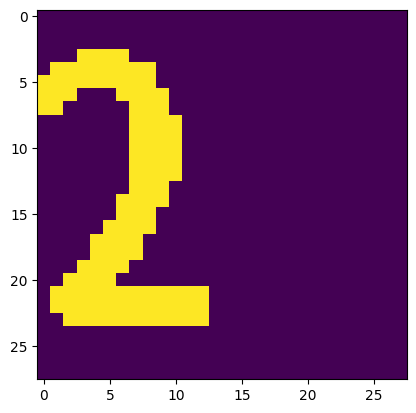

In [7]:
import matplotlib.pyplot as plt
import cv2
idx = 7
img = x.iloc[idx].values.reshape(28, 28)
print("Label:", y[idx])
plt.imshow(img)

Train-Test

In [14]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

Fit the model using svc and save using joblib

In [15]:
import joblib
from sklearn.svm import SVC
classifier = SVC(kernel="linear", random_state=8)
classifier.fit(train_x, train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

Calculate Accuracy

In [16]:
from sklearn import metrics
prediction = classifier.predict(test_x)
print("Accuracy = ", metrics.accuracy_score(prediction, test_y))

Accuracy =  0.96


Prediction of Drawn Image

In [22]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

In [24]:
model = joblib.load("model/digit_recognizer")
image_folder = "img/"
while True:
   img=ImageGrab.grab(bbox=(60,170,400,500))
    
   img.save(image_folder+"img.png")
   im = cv2.imread(image_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
    
   rows,cols=roi.shape
    
   X = []
    
   ##  Fill the data array with pixels one by one.
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
            
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
    
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 